# Opencv

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications.

Before we start, Let's install `opencv` library in your PC. Please make sure you have an internet connection available. It will take a while to download and install.

In [3]:
!pip install opencv-python

     |████████████████████████████████| 52.4 MB 27 kB/s eta 0:00:014    |▌                               | 819 kB 69 kB/s eta 0:12:25     |████████████████████▋           | 33.7 MB 73 kB/s eta 0:04:16     |█████████████████████▏          | 34.6 MB 202 kB/s eta 0:01:28     |█████████████████████████▉      | 42.2 MB 472 kB/s eta 0:00:22


## Table of Contents

### [Reading and Writing Images](#cvt1)

### [Adding Shapes and Letters](#cvt2)

### [Resizing images](#cvt3)

### [Splitting and Merging color channels](#cvt4)

### [Image Transformations](#cvt5)

### [Edge Detection methods](#cvt6)
 - [Sobel gradients](#cvt61)
 - [Canny edge detection](#cvt62)

### [Face Detection with CascadeClassifier](#cvt7)

### [Further Resources](#cvt8)

<a id=cvt1></a>
## Reading and Writing Images

In `opencv`, we can read and write image files with `imread()` and `imwrite()` and display them using `imshow()`
`waitKey(0)` waits until any key is pressed and `waitKey(milliseconds)` waits for a certain amount of time before the window is closed by `destroyAllWindows()` 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
img = cv2.imread("images/McE_logo.png",1)
# img = cv2.imread("images/McE_logo.jpg",0)
# img = cv2.imread("images/McE_logo.jpg",-1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original",img)
cv2.waitKey(0)
# cv2.waitKey(2000)
cv2.destroyAllWindows()

`cv2.imread()` reads images in BGR but `matplotlib` displays images in RGB format. Thus, we need to convert formats using `cv2.cvtColor()`. We can also use this function to convert images to grayscale.

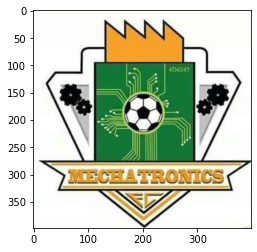

In [3]:
#convert to BGR format for matplotlib
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

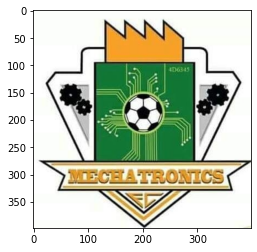

In [4]:
img = mpimg.imread("images/McE_logo.png")
plt.imshow(img)

`img.fill()` fills the entire image with particular shade of grayscale.

In [49]:
# img.fill(255)
# plt.imshow(img)

<a id=cvt2></a>
## Adding Shapes and Letters

We could do a bunch of stuff on our imported images. Let's try some functions

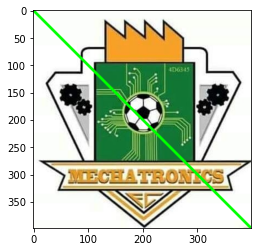

In [5]:
img = cv2.imread("images/McE_logo.png",1)

# cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), lineThickness)
cv2.line(img, (0, 0), (512, 512), (0, 255, 0), 3, lineType=8, shift=0)

#convert to RGB format for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

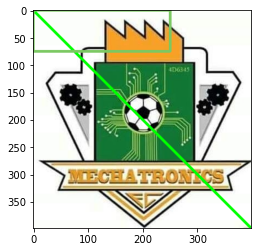

In [6]:
#cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), lineThickness, LineType , shift)
cv2.rectangle(img, (0,0), (500, 150), (123, 200, 98), 3, lineType=8, shift=1)

plt.imshow(img)

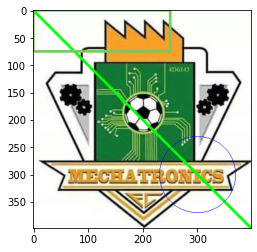

In [7]:
# cv2.circle(img, center, radius, color, thickness=1, lineType)
cv2.circle(img, (300, 300), 70, (0, 0, 255))
plt.imshow(img)

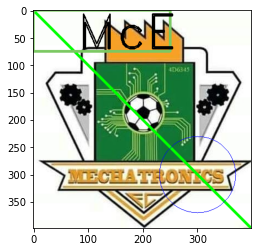

In [8]:
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img, 'McE', (80, 70), font, 3, (0,0,0), 2)
plt.imshow(img)

Thus, after drawing a bunch of beautiful stuff on our images using `cv2.line()`, `cv2.rectangle()`, `cv2.circle()` and `cv2.putText()`, we might not want our hard work to go waste. Let's try and save the image. using `cv2.imwrite()`

In [9]:
# cv2.imwrite(path to saved image, img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("saved_image.jpg", img)

True

<a id=cvt3></a>
## Resizing images

Image resizing is an important function for machine learning. Most images are needed to be resized to match the model's configurations. It can also serve as an augmentation method. Let's see what `cv2.resize()` can do.

In [10]:
img = cv2.imread("images/PL-Lion.png")
print(img.shape)

(620, 929, 3)


In [11]:
resized_img = cv2.resize(img,(500,500))
print(resized_img.shape)

(500, 500, 3)


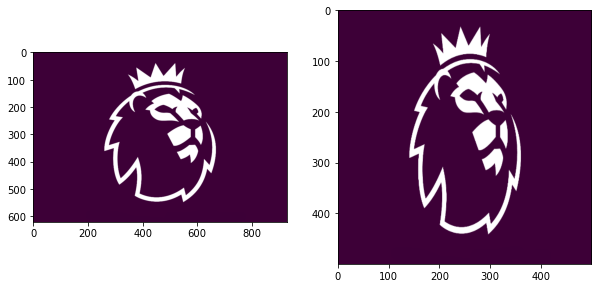

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(resized_img)

<a id=cvt4></a>
## Splitting and Merging color channels

`cv2.split()` offers a simple way to extract color channels.This is very handy as it offers manipulation to the color channels. As an alternative, we can also slice images.
The channels can be then remerged using `cv2.merge()`

[[ 8  8  8 ... 12 12 12]
 [ 8  8  8 ... 13 12 12]
 [ 8  8  8 ... 13 13 13]
 ...
 [13 13 13 ... 15 15 15]
 [12 12 12 ... 15 15 15]
 [12 12 12 ... 15 15 15]]


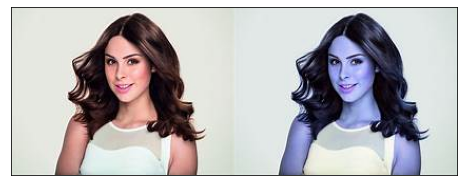

In [13]:
img=cv2.imread('images/lenaa.jpg')
# b,g,r = cv2.split(img)
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
print (s)
# s.fill(255)
# print (s)

hsv = cv2.merge((h,s,v))
hsv = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

original = cv2.merge((r,g,b))
mixed = cv2.merge((b,g,r))

stacked= np.hstack((hsv,mixed))
plt.figure(figsize=(8,8))
plt.xticks([]), plt.yticks([]) # remove the ticks
plt.imshow(stacked)

Let's try displaying each channel `subplot()` instead of stacking

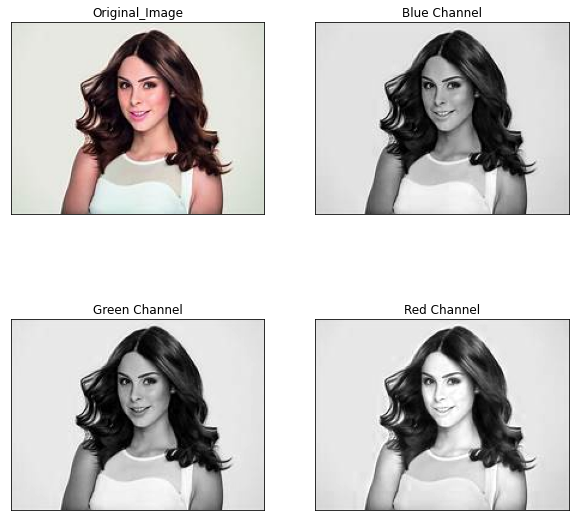

In [14]:
img=cv2.imread('images/lenaa.jpg')

b,g,r = cv2.split(img)

titles = ['Original_Image', 'Blue Channel', 'Green Channel', 'Red Channel']
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
images = [img, b, g, r]

plt.figure(figsize=(10,10))
for i in range(len(titles)):
    plt.subplot(2, 2, i+1)
    plt.imshow (images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

<a id=cvt5></a>
## Image Transformations

Images can be translated and rotated with ease using `cv2.wrapAffine(img,transformation matrix, resolution)`. Let's import our lab's logo first- 

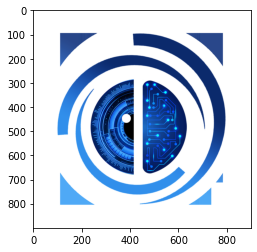

In [15]:
img = cv2.imread("images/cvml.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

To use `cv2.wrapAffine()` we must define our transformation matrix and resolution of the image. If we get our dimensions right, we can translate our image to anywhere on the figure.

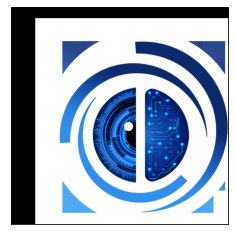

In [16]:
h,w,ch = img.shape

M = np.float32([[1,0,100],[0,1,50]])
translated = cv2.warpAffine(img,M,(w,h))
plt.xticks([]), plt.yticks([])
plt.imshow(translated)

For rotational purposes, we could use `cv2.getRotationMatrix2d(center,degrees,scale)` to calculate our rotation matrix M. 

[[   0.70710678    0.70710678 -186.39610307]
 [  -0.70710678    0.70710678  450.        ]]


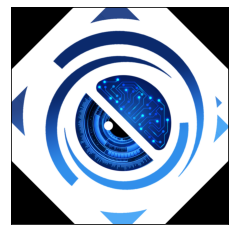

In [17]:
h,w,ch = img.shape
M = cv2.getRotationMatrix2D((w//2, h//2),45, 1)
print(M)
rotated = cv2.warpAffine(img, M, (w, h))
plt.xticks([]), plt.yticks([])
plt.imshow(rotated)

For reflection (flipping) purposes, we can simply use `cv2.flip(img,flipCode)`to flip the image.

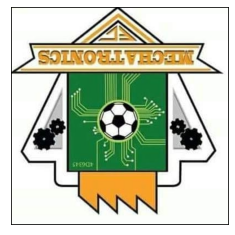

In [18]:
img = cv2.imread("images/MCE_logo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
flipped = cv2.flip(img,-1)
plt.xticks([]), plt.yticks([])
plt.imshow(flipped)

<a id=cvt6></a>
## Edge Detection methods

Edge detection is an image processing technique for finding the boundaries of objects within images. There are several ways to perform edge detection and we will focus on two popular methods for this lecture.

<a id=cvt61></a>
### Sobel gradients

[Sobel](https://en.wikipedia.org/wiki/Sobel_operator) operators uses kernels to calculate approximations of the derivatives.`cv2.Sobel()` needs image, kernel size and operating axis as input arguments.

We calculate x direction and y direction gradients first before calculating the magnitude of the sobel gradient. For detailed explaination on sobel gradients, you can follow this [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html).

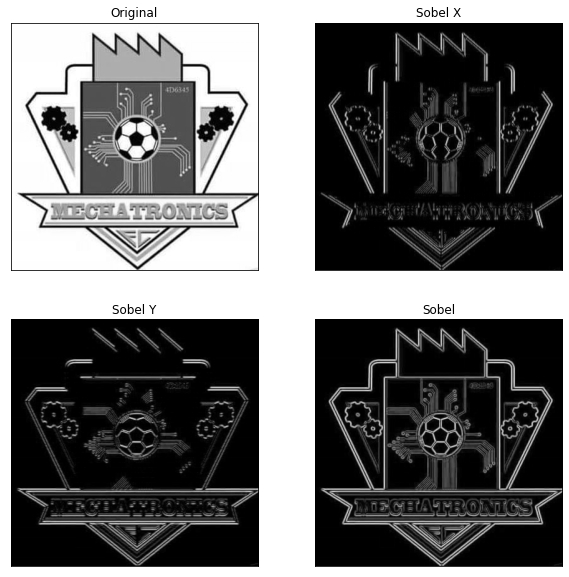

In [19]:
img = mpimg.imread('images/McE_logo.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sobelx = np.abs(cv2.Sobel(img,5,1,0))
sobelx = sobelx/np.max(sobelx)
sobely = np.abs(cv2.Sobel(img,5,0,1))
sobely = sobely/np.max(sobely)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

sobel = np.sqrt(sobelx**2 + sobely**2)
plt.subplot(2,2,4),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

<a id=cvt62></a>
### Canny edge detection

Canny Edge Detection is a popular edge detection algorithm developed by John F. Canny in 1986. `cv2.Canny()` has three arguments: Input image & min and max values of hysteresis threshold. You can learn more about canny edge  detection [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).



https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html

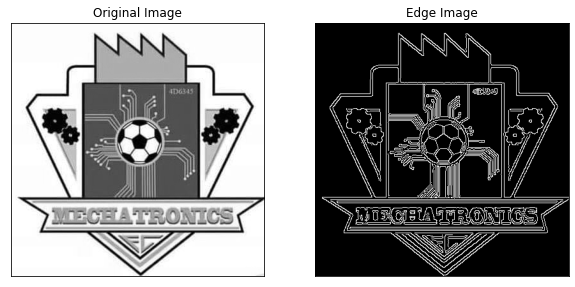

In [20]:
img = cv2.imread('images/McE_logo.png',0)

edges = cv2.Canny(img,100,200)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

<a id=cvt7></a>
## Face Detection with CascadeClassifier

In 2001, Paul Viola and Michael Jones published a research paper called ["Rapid Object Detection using a Boosted Cascade of Simple
Features"](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf). This paper sets the standards for new generations of face detectors computer vision field and still gets thousands of citations in 2020. Their face detection method is now known as [Viola-Jones method](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework).

`detectMultiScale()` from `CascadeClassifier()` returns 4 objects, namely, x and y coordinates of the detected face bottom left cornor and width and height of the detected face. 

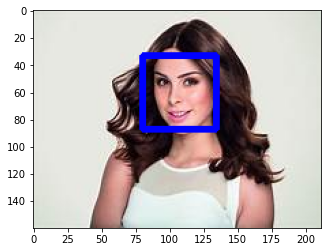

In [21]:
face_cascade = cv2.CascadeClassifier('detectors/haarcascade_frontalface_default.xml')
img = cv2.imread('images/lenaa.jpg')

faces = face_cascade.detectMultiScale(img, 1.1, 3)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w , y+h), (255, 0, 0), 3)

# cv2.imshow("Detection",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
#convert to BGR format for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

References -[Opencv tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html),
            [Python data science handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

<a id=cvt8></a>
## Further Resources

Please refer to official [OpenCV Python tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) to learn more about image processing techniques using cv2. Also check this awesome [opencv tutorials](https://www.pyimagesearch.com/category/opencv/) from [pyimageserach](https://www.pyimagesearch.com/) website.